In [10]:
import numpy as np
from scipy.integrate import solve_ivp,solve_bvp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import sympy as sym
from sympy.solvers import ode
import math

In [11]:
N = 1000 # пространственные узлы
M = 1000 # временные узлы
l = 5 # длина стержня
hx = l/N
T = 10 # максимальное время 
ht = T/M
x_num = np.linspace(0,l,N+1)
t_num = np.linspace(0,T,M+1)


In [12]:
m = 10
q = m * 9.81
alpha = 0.1
P = 1e5
E = 2.06 * 10**11
Jx = np.pi * 0.05**4 / 64 * (1 - 0.04**4 / 0.05**4)
P_cr = np.pi**2 * E * Jx / l**2
print(P_cr)

14730.694472351943


In [13]:
y = np.zeros((M+1,N+3)) # сетка имеет два технических доп узла, слева и справа( для удобства расчётов)
y[0,:] = 0 # init conds
y[1,:] = 0 # init conds
y[:,1] = 0 # bc conds
y[:,N+1] = 0 # bc conds
y.shape

(1001, 1003)

In [18]:
for i in range(2,M+1):
    for j in range(2,N+1):
        y[i,j] = ((2*q*hx**4 + 4*P*(y[i-1,j+1]-2*y[i-1,j]+y[i-1,j-1])*hx**2 
                   - 2*E*Jx*(y[i-1,j+2]-4*y[i-1,j+1]+6*y[i-1,j]-4*y[i-1,j-1]+y[i-1,j-2]))*ht**2 
                   + alpha*y[i-2,j]*ht*hx**4 + 4*hx**4*m*(y[i-1,j]-y[i-1,j-1]/2))/ (hx**4*(alpha*ht+2*m))
        if j==2:
            y[i,0] = y[i,j]
        if j==N:
            y[i,N+2] = y[i,j]
ans = y[:,1:N+2]                         

C:\Users\Max\AppData\Local\Temp\ipykernel_18132\3683562803.py:3: RuntimeWarning: overflow encountered in scalar multiply
  y[i,j] = ((2*q*hx**4 + 4*P*(y[i-1,j+1]-2*y[i-1,j]+y[i-1,j-1])*hx**2
C:\Users\Max\AppData\Local\Temp\ipykernel_18132\3683562803.py:4: RuntimeWarning: overflow encountered in scalar multiply
  - 2*E*Jx*(y[i-1,j+2]-4*y[i-1,j+1]+6*y[i-1,j]-4*y[i-1,j-1]+y[i-1,j-2]))*ht**2
C:\Users\Max\AppData\Local\Temp\ipykernel_18132\3683562803.py:3: RuntimeWarning: overflow encountered in scalar divide
  y[i,j] = ((2*q*hx**4 + 4*P*(y[i-1,j+1]-2*y[i-1,j]+y[i-1,j-1])*hx**2
C:\Users\Max\AppData\Local\Temp\ipykernel_18132\3683562803.py:3: RuntimeWarning: invalid value encountered in scalar add
  y[i,j] = ((2*q*hx**4 + 4*P*(y[i-1,j+1]-2*y[i-1,j]+y[i-1,j-1])*hx**2
C:\Users\Max\AppData\Local\Temp\ipykernel_18132\3683562803.py:4: RuntimeWarning: overflow encountered in scalar add
  - 2*E*Jx*(y[i-1,j+2]-4*y[i-1,j+1]+6*y[i-1,j]-4*y[i-1,j-1]+y[i-1,j-2]))*ht**2
C:\Users\Max\AppData\Local\Temp\ip

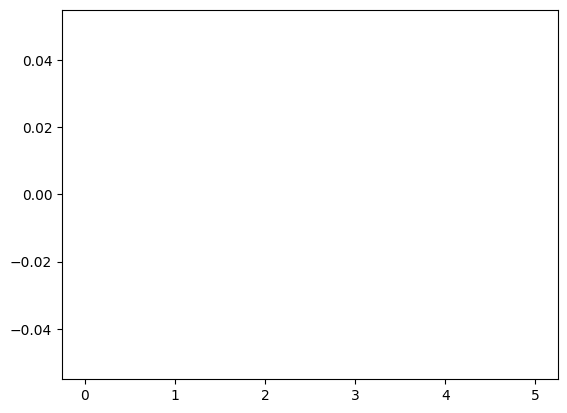

In [24]:
plt.plot(x_num,ans[900])  